# National Stock Exchange -> Time Series Analysis & Forecast

In [1]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
#import packages
import pandas as pd
from pandas import datetime
import numpy as np


#to plot within notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import seaborn as sns


#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [3]:
path = '../input/national-stock-exchange-time-series/'

TCS = pd.read_csv(path + 'tcs_stock.csv', parse_dates=['Date'])

INFY = pd.read_csv(path + 'infy_stock.csv', parse_dates=['Date'])

NIFTY = pd.read_csv(path + 'nifty_it_index.csv', parse_dates=['Date'])


stocks = [TCS, INFY, NIFTY]


TCS.name = 'TCS'
INFY.name = 'INFY'
NIFTY.name = 'NIFTY_IT'

In [4]:
TCS["Date"] = pd.to_datetime(TCS["Date"])
INFY["Date"] = pd.to_datetime(INFY["Date"])
NIFTY["Date"] = pd.to_datetime(NIFTY["Date"])

In [5]:
TCS.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [6]:
TCS.shape

(248, 15)

In [7]:
INFY.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [8]:
NIFTY.head(5)

,Date,Open,High,Low,Close,Volume,Turnover
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


# Featuring Year,Month,Date Seperately

In [9]:
# Features Generation


def features_build(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear
    
    
    
for i in range(len(stocks)):
    # print(stocks[i])
    features_build(stocks[i])
    

In [10]:
# check for newly added features. 
TCS.shape

(248, 19)

In [11]:
TCS.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day,WeekOfYear
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.0,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,2015,1,1,1
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2015,1,2,1
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.1,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,2015,1,5,2


#### Target Variable : Set Close (Closing Price to be the target variable).

## PART-1

In [12]:
# Lets define a function for moving average with rolling window

# Sklearn has seperate function to calculate this: [ DataFrame.rolling(window).mean() ].

def moving_average(series, n):
    """
        Calculate average of last n observations
        
        n - rolling window
    """
    return np.average(series[-n:])


'''
# We can also imlement this user-defined function. But, first we need to isolate both 'Date' and 'Close' columns
under consideration. After that, we need to resample according to week , using:

df.resample('W')

function. Then We will pass the 'Close' column as the 'series' argument to the custom built function.
And, n = rolling window size.


But: We are not doing that here to maintain simplicity in code.

'''

"\n# We can also imlement this user-defined function. But, first we need to isolate both 'Date' and 'Close' columns\nunder consideration. After that, we need to resample according to week , using:\n\ndf.resample('W')\n\nfunction. Then We will pass the 'Close' column as the 'series' argument to the custom built function.\nAnd, n = rolling window size.\n\n\nBut: We are not doing that here to maintain simplicity in code.\n\n"

##### Let us calculate moving averages (closing price) for weeks = [4,16,28,40,52]

In [13]:
weeks = [4, 16, 28, 40, 52]

In [14]:
def indexing(stock):
    stock.index = stock['Date']
    return stock

In [15]:
indexing(TCS)
indexing(INFY)
indexing(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,2015-12-24,11193.25,11197.50,11152.85,11184.90,2927864,3.182700e+09,2015,12,24,52
2015-12-28,2015-12-28,11152.70,11303.05,11146.85,11271.80,8055590,1.001900e+10,2015,12,28,53
2015-12-29,2015-12-29,11257.05,11287.50,11206.60,11253.45,6024174,6.626200e+09,2015,12,29,53


In [9]:
weeks = [4, 16, 28, 40, 52]
for i in range(len(weeks)):
   print(i)

0
1
2
3
4


In [16]:
def plot_time_series(stock, weeks = [4, 16, 28, 40, 52]):
    
    dummy = pd.DataFrame()
    # First Resampling into Weeks format to calculate for weeks
    dummy['Close'] = stock['Close'].resample('W').mean() 
     
    for i in range(len(weeks)):
        m_a = dummy['Close'].rolling(weeks[i]).mean() # M.A using inbuilt function
        dummy[" Mov.AVG for " + str(weeks[i])+ " Weeks"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], dummy['Close']))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))
    

##### Table With Calculated Moving Average + plot for Moving averages for weeks = [4,16,28,40,52]

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04    2562.500000
2015-01-11    2472.130000
2015-01-18    2520.160000
2015-01-25    2508.480000
2015-02-01    2517.087500
2015-02-08    2542.980000
2015-02-15    2482.970000
2015-02-22    2644.262500
2015-03-01    2677.941667
2015-03-08    2721.962500
2015-03-15    2619.490000
2015-03-22    2582.510000
2015-03-29    2562.020000
2015-04-05    2553.583333
2015-04-12    2618.400000
2015-04-19    2585.225000
2015-04-26    2450.250000
2015-05-03    2486.550000
2015-05-10    2506.990000
2015-05-17    2520.940000
2015-05-24    2552.710000
2015-05-31    2608.980000
2015-06-07    2602.010000
2015-06-14    2563.390000
2015-06-21    2522.040000
2015-06-28    2575.840000
2015-07-05    2583.720000
2015-07-12    2568.300000
2015-07-19    2531.880000
2015-07-26    2532.470000
2015-08-02    2499.450000
2015-08-09    2538.200000
2015-08-16    2637.360000
2015-08-23    2704.450000
2015-08-30    2573.610000
2015-09-06    2569.260000
2015-09-13    2

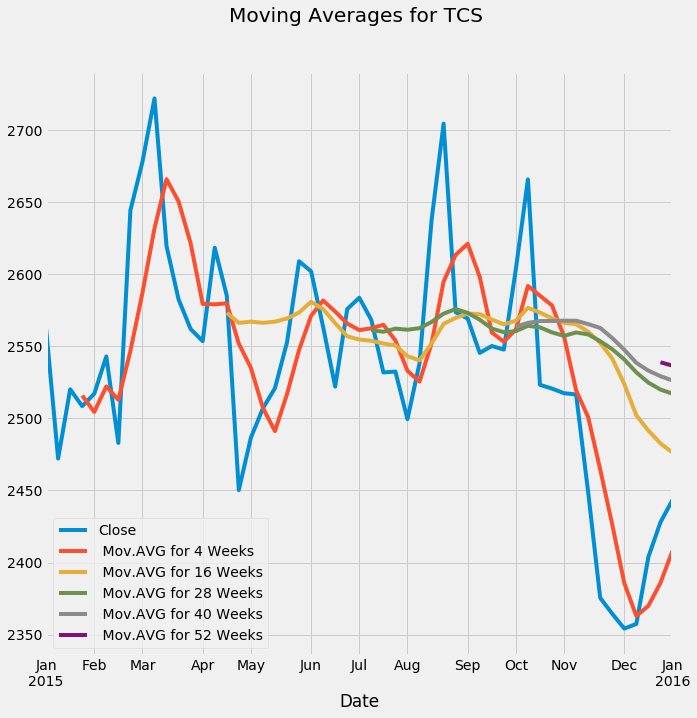

In [17]:
plot_time_series(TCS)

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04    1993.800000
2015-01-11    1992.310000
2015-01-18    2117.210000
2015-01-25    2161.620000
2015-02-01    2142.112500
2015-02-08    2164.980000
2015-02-15    2283.870000
2015-02-22    2295.762500
2015-03-01    2279.383333
2015-03-08    2277.950000
2015-03-15    2201.790000
2015-03-22    2244.910000
2015-03-29    2202.500000
2015-04-05    2206.766667
2015-04-12    2197.440000
2015-04-19    2206.600000
2015-04-26    2105.930000
2015-05-03    1962.237500
2015-05-10    1955.970000
2015-05-17    1958.800000
2015-05-24    2031.520000
2015-05-31    2006.470000
2015-06-07    2023.410000
2015-06-14    1998.270000
2015-06-21     996.560000
2015-06-28    1003.010000
2015-07-05     990.040000
2015-07-12     959.360000
2015-07-19     979.260000
2015-07-26    1080.530000
2015-08-02    1072.120000
2015-08-09    1081.020000
2015-08-16    1129.360000
2015-08-23    1153.300000
2015-08-30    1087.230000
2015-09-06    1091.230000
2015-09-13    1

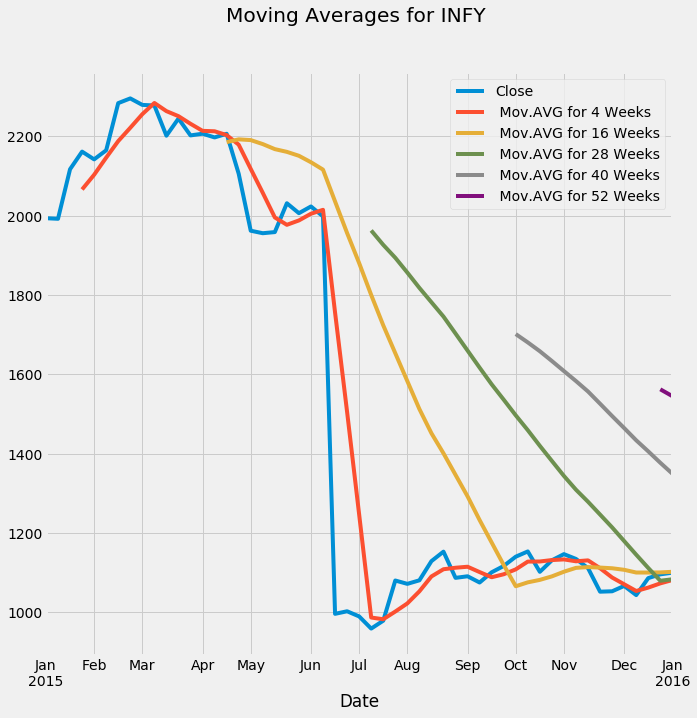

In [18]:
plot_time_series(INFY)

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04    11293.9000
2015-01-11    11108.4500
2015-01-18    11598.0400
2015-01-25    11777.4900
2015-02-01    11787.9750
2015-02-08    12055.9700
2015-02-15    12298.5000
2015-02-22    12603.9250
2015-03-01    12567.3500
2015-03-08    12728.9250
2015-03-15    12383.0900
2015-03-22    12343.4000
2015-03-29    12104.1300
2015-04-05    12045.3500
2015-04-12    12149.4100
2015-04-19    12087.6000
2015-04-26    11439.2800
2015-05-03    11061.5750
2015-05-10    11120.0700
2015-05-17    11175.8000
2015-05-24    11514.0700
2015-05-31    11519.7300
2015-06-07    11381.0800
2015-06-14    11211.9500
2015-06-21    11163.1100
2015-06-28    11339.5300
2015-07-05    11154.1100
2015-07-12    11000.4400
2015-07-19    11130.7500
2015-07-26    11517.8000
2015-08-02    11425.6200
2015-08-09    11542.7000
2015-08-16    11859.2800
2015-08-23    12085.5600
2015-08-30    11420.2300
2015-09-06    11554.6600
2015-09-13    11408.5000
2015-09-20    11597.5000
2

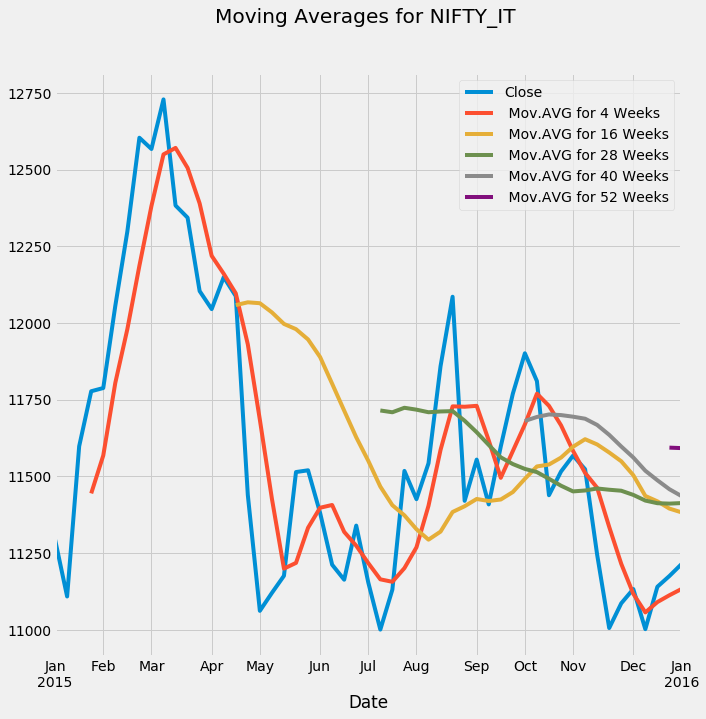

In [19]:
plot_time_series(NIFTY)

##### Now , we further have to put rolling window as 10 and then 75. Keeping in mind the stock market holidays. For that, we first need to resample again as per days. We are not worried about special/ national holidays. because for that we need to use special calendar APIs, which may provide us holidays for each year. Here, we are only considering STOCK MARKET HOLIDAYS. ie. Saturday and Sunday


##### Thus, instead of `resample()`, we will here use `resample.Resampler.asfreq()` function. Because it also provide us option of padding (backwardfill/forwardfill missing values "not NANs" ). source: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.asfreq.html We are using this, because on saturdays and sundays, market remains closed, so friday's close price could be forwarded in closing days.

In [20]:
TCS = TCS.asfreq('D', method ='pad')        # pad-ffill : forward-fill
INFY = INFY.asfreq('D', method ='pad')
NIFTY = NIFTY.asfreq('D', method ='pad')


TCS.name = 'TCS'
INFY.name = 'INFY'
NIFTY.name = 'NIFTY_IT'

In [21]:
def plot_roll_win(stock, win = [10, 75]):
    
    dummy = pd.DataFrame()
    
    dummy['Close'] = stock['Close']
     
    for i in range(len(win)):
        m_a = dummy['Close'].rolling(win[i]).mean() # M.A using predefined function
        dummy[" Mov.AVG for " + str(win[i])+ " Roll Window"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(win[i], dummy['Close']))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))

Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    2545.55
2015-01-02    2579.45
2015-01-03    2579.45
2015-01-04    2579.45
2015-01-05    2540.25
               ...   
2015-12-27    2434.25
2015-12-28    2462.70
2015-12-29    2455.80
2015-12-30    2418.30
2015-12-31    2436.85
Freq: D, Name: Close, Length: 365, dtype: float64
Calculated Moving Averages: for 75 weeks: 

 Date
2015-01-01    2545.55
2015-01-02    2579.45
2015-01-03    2579.45
2015-01-04    2579.45
2015-01-05    2540.25
               ...   
2015-12-27    2434.25
2015-12-28    2462.70
2015-12-29    2455.80
2015-12-30    2418.30
2015-12-31    2436.85
Freq: D, Name: Close, Length: 365, dtype: float64


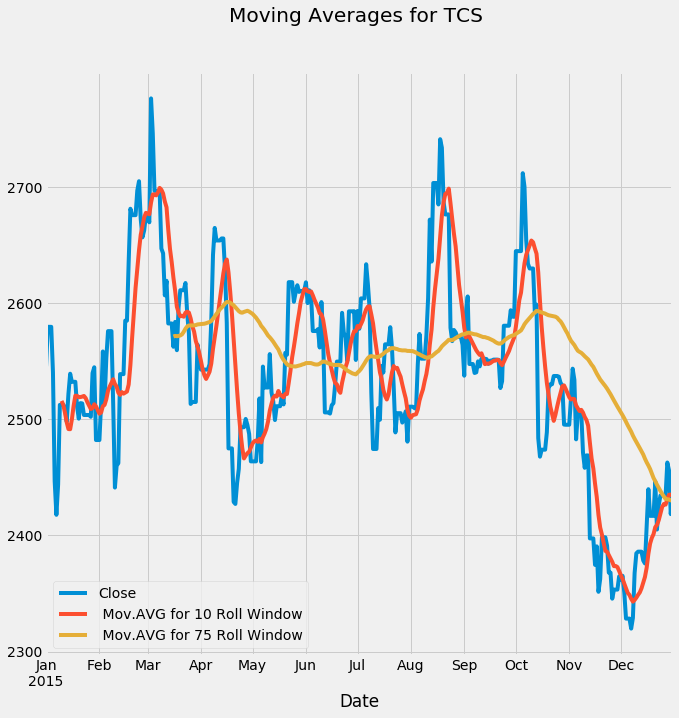

In [22]:
plot_roll_win(TCS)

Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    1974.40
2015-01-02    2013.20
2015-01-03    2013.20
2015-01-04    2013.20
2015-01-05    1995.90
               ...   
2015-12-27    1096.35
2015-12-28    1104.75
2015-12-29    1104.70
2015-12-30    1086.30
2015-12-31    1105.40
Freq: D, Name: Close, Length: 365, dtype: float64
Calculated Moving Averages: for 75 weeks: 

 Date
2015-01-01    1974.40
2015-01-02    2013.20
2015-01-03    2013.20
2015-01-04    2013.20
2015-01-05    1995.90
               ...   
2015-12-27    1096.35
2015-12-28    1104.75
2015-12-29    1104.70
2015-12-30    1086.30
2015-12-31    1105.40
Freq: D, Name: Close, Length: 365, dtype: float64


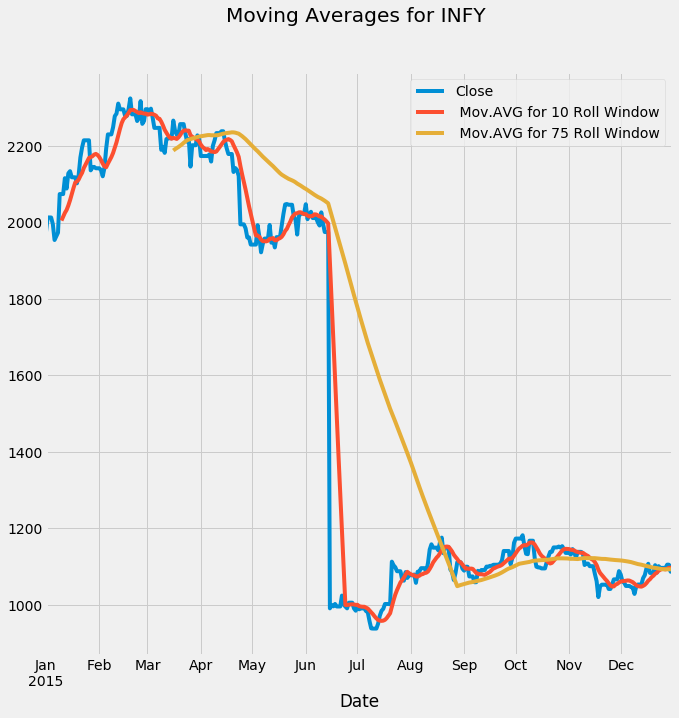

In [23]:
plot_roll_win(INFY)

Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    11215.70
2015-01-02    11372.10
2015-01-03    11372.10
2015-01-04    11372.10
2015-01-05    11248.55
                ...   
2015-12-27    11184.90
2015-12-28    11271.80
2015-12-29    11253.45
2015-12-30    11117.60
2015-12-31    11212.55
Freq: D, Name: Close, Length: 365, dtype: float64
Calculated Moving Averages: for 75 weeks: 

 Date
2015-01-01    11215.70
2015-01-02    11372.10
2015-01-03    11372.10
2015-01-04    11372.10
2015-01-05    11248.55
                ...   
2015-12-27    11184.90
2015-12-28    11271.80
2015-12-29    11253.45
2015-12-30    11117.60
2015-12-31    11212.55
Freq: D, Name: Close, Length: 365, dtype: float64


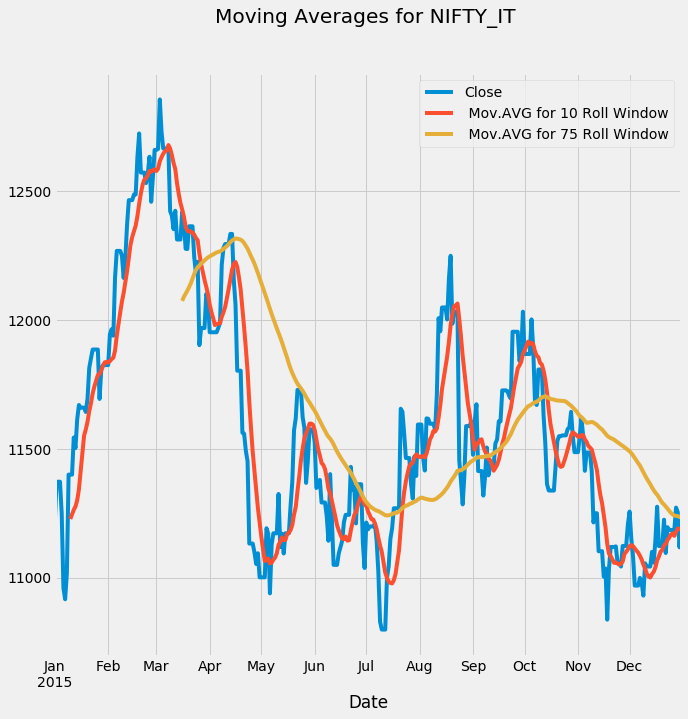

In [24]:
plot_roll_win(NIFTY)

##### **Conclusion** : From Above graph plottings, we can visualize that, as much as the rolling window is small, the moving average is somehow significant and closer to the actual data

### Volume Shocks

In [25]:
def volume_shocks(stock):
    """
    'Volume' - Vol_t
    'Volume next day - vol_t+1
    
    """
    stock["vol_t+1"] = stock.Volume.shift(1)  #next rows value
    
    stock["volume_shock"] = ((abs(stock["vol_t+1"] - stock["Volume"])/stock["Volume"]*100)  > 10).astype(int)
    
    return stock

In [26]:
volume_shocks(TCS)
volume_shocks(INFY)
volume_shocks(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock
Date,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,2015-12-24,11193.25,11197.50,11152.85,11184.90,2927864,3.182700e+09,2015,12,24,52,2927864.0,0
2015-12-28,2015-12-28,11152.70,11303.05,11146.85,11271.80,8055590,1.001900e+10,2015,12,28,53,2927864.0,1
2015-12-29,2015-12-29,11257.05,11287.50,11206.60,11253.45,6024174,6.626200e+09,2015,12,29,53,8055590.0,1


#### Volume Shock Direction

In [27]:
def direction_fun(stock):
    
    # considerng only shock - 1 valued rows.
    # 0 - negative and 1- positive
    if stock["volume_shock"] == 0:
        pass
    else:
        if (stock["vol_t+1"] - stock["Volume"]) < 0:
            return 0
        else:
            return 1

In [28]:
def vol_shock_direction(stock):
    stock['VOL_SHOCK_DIR'] = 'Nan'
    stock['VOL_SHOCK_DIR'] = stock.apply(direction_fun, axis=1)
    return stock

In [29]:
vol_shock_direction(TCS)
vol_shock_direction(INFY)
vol_shock_direction(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,2015-12-24,11193.25,11197.50,11152.85,11184.90,2927864,3.182700e+09,2015,12,24,52,2927864.0,0,NaN
2015-12-28,2015-12-28,11152.70,11303.05,11146.85,11271.80,8055590,1.001900e+10,2015,12,28,53,2927864.0,1,0.0
2015-12-29,2015-12-29,11257.05,11287.50,11206.60,11253.45,6024174,6.626200e+09,2015,12,29,53,8055590.0,1,1.0


##### Price shocks

In [30]:
def price_shocks(stock):
    """
    'ClosePrice' - Close_t
    'Close Price next day - vol_t+1
    
    """
    stock["price_t+1"] = stock.Close.shift(1)  #next rows value
    
    stock["price_shock"] = (abs((stock["price_t+1"] - stock["Close"])/stock["Close"]*100)  > 2).astype(int)
    
    stock["price_black_swan"] = stock['price_shock'] # Since both had same data anad info/
    
    return stock

In [31]:
price_shocks(TCS)
price_shocks(INFY)
price_shocks(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN,NaN,0,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0,11215.70,0,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0,11372.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,2015-12-24,11193.25,11197.50,11152.85,11184.90,2927864,3.182700e+09,2015,12,24,52,2927864.0,0,NaN,11184.90,0,0
2015-12-28,2015-12-28,11152.70,11303.05,11146.85,11271.80,8055590,1.001900e+10,2015,12,28,53,2927864.0,1,0.0,11184.90,0,0
2015-12-29,2015-12-29,11257.05,11287.50,11206.60,11253.45,6024174,6.626200e+09,2015,12,29,53,8055590.0,1,1.0,11271.80,0,0


##### Price Shock Direction and Black Swan shock direction (both same)

In [32]:
def direction_fun_price(stock):
    
    # considerng only shock - 1 valued rows.
    # 0 - negative and 1- positive
    if stock["price_shock"] == 0:
        pass
    else:
        if (stock["price_t+1"] - stock["Close"]) < 0:
            return 0
        else:
            return 1

In [33]:
def price_shock_direction(stock):
    stock['PRICE_SHOCK_DIR'] = 'Nan'
    stock['PRICE_SHOCK_DIR'] = stock.apply(direction_fun_price, axis=1)
    return stock

In [34]:
vol_shock_direction(TCS)
vol_shock_direction(INFY)
vol_shock_direction(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN,NaN,0,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0,11215.70,0,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0,11372.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,2015-12-24,11193.25,11197.50,11152.85,11184.90,2927864,3.182700e+09,2015,12,24,52,2927864.0,0,NaN,11184.90,0,0
2015-12-28,2015-12-28,11152.70,11303.05,11146.85,11271.80,8055590,1.001900e+10,2015,12,28,53,2927864.0,1,0.0,11184.90,0,0
2015-12-29,2015-12-29,11257.05,11287.50,11206.60,11253.45,6024174,6.626200e+09,2015,12,29,53,8055590.0,1,1.0,11271.80,0,0


##### Price Shock w/o volume shocks

In [35]:
def price_shock_wo_vol_shock(stock):
    
    stock["not_vol_shock"]  = (~(stock["volume_shock"].astype(bool))).astype(int)
    stock["price_shock_w/0_vol_shock"] = stock["not_vol_shock"] & stock["price_shock"]
    
    return stock

In [36]:
price_shock_wo_vol_shock(TCS)
price_shock_wo_vol_shock(INFY)
price_shock_wo_vol_shock(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan,not_vol_shock,price_shock_w/0_vol_shock
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN,NaN,0,0,1,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0,11215.70,0,0,0,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0,1,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0,1,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0,11372.10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,2015-12-24,11193.25,11197.50,11152.85,11184.90,2927864,3.182700e+09,2015,12,24,52,2927864.0,0,NaN,11184.90,0,0,1,0
2015-12-28,2015-12-28,11152.70,11303.05,11146.85,11271.80,8055590,1.001900e+10,2015,12,28,53,2927864.0,1,0.0,11184.90,0,0,0,0
2015-12-29,2015-12-29,11257.05,11287.50,11206.60,11253.45,6024174,6.626200e+09,2015,12,29,53,8055590.0,1,1.0,11271.80,0,0,0,0


## Part-2 Visualisation with BOKEH

In [37]:
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from bokeh.palettes import Blues9
from bokeh.palettes import RdBu3
from bokeh.models import ColumnDataSource, CategoricalColorMapper, ContinuousColorMapper
from bokeh.palettes import Spectral11

In [38]:
output_notebook()

Loading BokehJS ...

In [39]:
def bokeh_plot(stock):
    data = dict(stock=stock['Close'], Date=stock.index)
    
    p = figure(plot_width=800, plot_height=250,  title = 'time series for {}' .format(stock.name), x_axis_type="datetime")
    p.line(stock.index, stock['Close'], color='blue', alpha=0.5)
    
    #show price shock w/o vol shock
    
    p.circle(stock.index, stock.Close*stock["price_shock_w/0_vol_shock"], size=4, legend_label='price shock without vol shock')
    show(p)

In [40]:
output_file("timeseries.html")

bokeh_plot(TCS)
bokeh_plot(INFY)
bokeh_plot(NIFTY)

In [41]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(stock):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot {}" .format(stock.name))

    partial_autocorr = pacf(stock["Close"], nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    show(p)

In [42]:
output_file("PACF.html")

draw_pacf(TCS)
draw_pacf(INFY)
draw_pacf(NIFTY)

# Time Series for Deep Learning

In [ ]:
Time series used when we trying to predict say what type of car we are going to sell next.
To do so,We Traditionally would put additional input neurons into input layer and we keep on adding the sequence of the input 
into this one.Say our output was sold car 1,sold car 2,3,4 and using this slot we predict 5 then next time using 2,3,4,5 we will predict 6.
So Thats we slide and this is called as sequence of size=4.

# How LSTM Works?

In [ ]:
We would not be adding the additional neurons.Say we got a sequence of size = 5(5 target values in a row) say we have 4 input neuron.
So all this 5 will go to all 4 input neuron. For the next one we would call neural netwok again we would sent second sequence.
Traditionally when we sent the previous_input_points(as while training the data) we got the same result but 
------------RECURRENT NEURAL NETWORK---------- maintains the state and each time we pass some sequence into nn this inernal state is changing.
This internal state resets at the beginning and the end of the sequence.

In [ ]:
Previously we trained neural networks with input ($x$) and expected output ($y$). 
$X$ was a matrix, the rows were training examples and the columns were values to be predicted. 
The definition of $x$ will be expanded and y will stay the same.

Dimensions of training set ($x$):

Axis 1: Training set elements (sequences) (must be of the same size as $y$ size)
Axis 2: Members of sequence
Axis 3: Features in data (like input neurons)

In [ ]:
LSTM islike a neuron. In LSTM we have three gate--Input gate, output gate , forget gate(0 means we should forget 1 means we should remember , we calculate this using sigmoid function).
2 functions :"Sigmoid" , "tanh"
# Jeff you-tube at 12:00 in 10.2

# Recurrent Neural Netwoks

In [ ]:
 we can calculate the recurrent connections with the following three approaches:

$ Context neurons $ - Its like a short term memory which holds some value between calls to the neural network.
Context neurons always output 0 on their first call but subsequently they hold some value as a sequence is being processessed.
As new sequence comes in their value goes to zero.They occurs in hidden layer. 
Each hidden is connected to its corresponding context neuron but weightless connection(dotted line) not dense.
The two context neurons form dense, weighted connections to the two hidden neurons.
Finally, the two hidden neurons also form dense connections to the neurons in the next layer. 
The two context neurons would form two connections to a single neuron in the next layer, four connections to two neurons, six connections to three neurons, and so on.


Calculating output over a fixed number of iterations
Calculating output until neuron output stabilizes

# GRU

In [ ]:
Similiar to LSTM. Its does not have many gates.Much simplier 

In [ ]:
# Simplier LSTM Example

In [ ]:

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
import numpy as np

max_features = 4 # 0,1,2,3 (total of 4)
# 3D but has only one feature such as 0, 1 ,.....
x = [
    [[0],[1],[1],[0],[0],[0]],
    [[0],[0],[0],[2],[2],[0]],
    [[0],[0],[0],[0],[3],[3]],
    [[0],[2],[2],[0],[0],[0]],
    [[0],[0],[3],[3],[0],[0]],
    [[0],[0],[0],[0],[1],[1]]
]
x = np.array(x,dtype=np.float32)
y = np.array([1,2,3,2,3,1],dtype=np.int32)

# Convert y2 to dummy variables
y2 = np.zeros((y.shape[0], max_features),dtype=np.float32)
y2[np.arange(y.shape[0]), y] = 1.0
print(y2)

print('Build model...')
model = Sequential()
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, 1)))
model.add(Conv1D(128, kernel_size=x.shape[1], input_shape=(None, 1)))
model.add(Dense(4, activation='sigmoid'))


# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x,y2,epochs=200)
pred = model.predict(x)
predict_classes = np.argmax(pred,axis=1)
print("Predicted classes: {}",predict_classes)
print("Expected classes: {}",predict_classes)

In [ ]:
def runit(model, inp):
    inp = np.array(inp,dtype=np.float32)
    pred = model.predict(inp)
    return np.argmax(pred[0])

In [ ]:
print( runit( model, [[[0],[0],[0],[0],[0],[1]]] ))

# How to convert the data into sequences

In [ ]:
import pandas as pd
import os

# Replacce the following path with your own file. It can be downloaded from:
# http://www.sidc.be/silso/INFO/sndtotcsv.php

if COLAB:
    PATH = "/content/drive/My Drive/Colab Notebooks/data/"
else:
    PATH = "./data/"
    
filename = os.path.join(PATH,"SN_d_tot_V2.0.csv")    
names = ['year', 'month', 'day', 'dec_year', 'sn_value' , 
         'sn_error', 'obs_num']
df = pd.read_csv(filename,sep=';',header=None,names=names,
                 na_values=['-1'], index_col=False)

print("Starting file:")
print(df[0:10])

print("Ending file:")
print(df[-10:])


------------------------
start_id = max(df[df['obs_num'] == 0].index.tolist())+1  # Find the last zero and move one beyond
print(start_id)
df = df[start_id:] # Trim the rows that have missing observations


df['sn_value'] = df['sn_value'].astype(float)
df_train = df[df['year']<2000]
df_test = df[df['year']>=2000]

spots_train = df_train['sn_value'].tolist()
spots_test = df_test['sn_value'].tolist()

print("Training set has {} observations.".format(len(spots_train)))
print("Test set has {} observations.".format(len(spots_test)))
-------------------------------------------
# Converting into sequences



import numpy as np

def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
    
    
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,spots_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,spots_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

In [ ]:
Shape of training set: (55150, 10, 1)
Shape of test set: (7295, 10, 1)

In [ ]:
# X_train
array([[[353.],
        [240.],
        [275.],
        ...,
        [340.],
        [238.],
        [287.]],........


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

print('Build model...')
model = Sequential()
model.add(LSTM(64, dropout=0.0, recurrent_dropout=0.0,input_shape=(None, 1)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
print('Train...')

model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

-----------------------------------
from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))